<a href="https://colab.research.google.com/github/Kals-13/AutoEncoders/blob/main/VanillaAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import torch
import torchvision
import torchvision.transforms as transform
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [3]:
path = '/content/gdrive/MyDrive/MNIST dataset'
train_set_csv = pd.read_csv(f'{path}/train.csv')

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
train_set = train_set_csv.iloc[:, 1:]
train_set = train_set.values.reshape(-1, 28, 28, 1)
train_images = torch.Tensor(train_set).permute(0, 3, 1, 2)

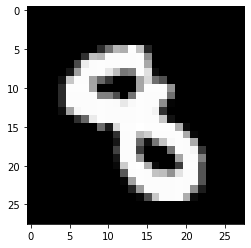

In [6]:
plt.imshow(np.squeeze(train_set[67]), cmap='gray', vmin=0, vmax=255)

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3),
            nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
        )
    def forward(self, X):
        return self.decoder(self.encoder(X))

In [8]:
loss_fn = nn.MSELoss()
num_epochs = 6
batch_size = 128
model = AutoEncoder()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [9]:
def train_model(X):
    train_loss = []
    for epoch in range(1, num_epochs+1):
        cost_per_epoch = 0
        permutation = torch.randperm(X.shape[0])
        for i in range(0, X.shape[0], batch_size):
            indices = permutation[i : i+batch_size]
            mini_batch = X[indices]

            output = model(mini_batch)
            optimiser.zero_grad()
            loss = loss_fn(output, mini_batch)
            cost_per_epoch += loss.item() 
            loss.backward()
            optimiser.step()
        avg_loss = cost_per_epoch / X.shape[0]
        print("Loss after iteration ", epoch, " is ", avg_loss)
        train_loss.append(avg_loss)
    plt.plot(train_loss)
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.show()
    return train_loss

Loss after iteration  1  is  6.961503146398635
Loss after iteration  2  is  0.19149562985556468
Loss after iteration  3  is  0.10962913903735932
Loss after iteration  4  is  0.0796642575945173
Loss after iteration  5  is  0.06512510669799078
Loss after iteration  6  is  0.06160981760138557


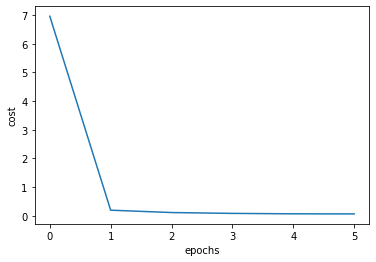

In [10]:
model = model.to(device)
train_loss = train_model(train_images)

In [11]:
def visualise_results(X):
    images = X.numpy()
    _, axs = plt.subplots(1, 10)
    for img, ax in zip(train_set, axs):
        ax.imshow(np.squeeze(img), cmap='gray', vmin=0, vmax=255)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

    output = model(X).detach().numpy()
    _, axs = plt.subplots(1, 10)
    for img, ax in zip(output, axs):
        ax.imshow(np.squeeze(img), cmap='gray', vmin=0, vmax=255)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

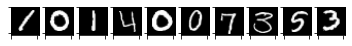

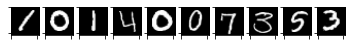

In [12]:
visualise_results(train_images)

In [13]:
from google.colab import files
torch.save(model, 'VanillaAutoEncoder.ipynb')
files.download('VanillaAutoEncoder.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>